# Import Required Libraries
Import the necessary libraries, including pandas.

In [1]:
# Import Required Libraries
import pandas as pd  # Import pandas library for data manipulation
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

# Load Data from File
Load the data from the 'updates_Labels' file using pandas.

In [75]:

file_path = 'updated_Labels.txt'  
data = pd.read_csv(file_path, delim_whitespace=True, names=['Sample', 'output'])

# Convert the 'output' column to strings and strip any whitespace
data['output'] = data['output'].astype(str).str.strip()

# Display the first few rows of the DataFrame to verify the data is loaded correctly
data.head()

C:\Users\berrayan\AppData\Local\Temp\ipykernel_18696\900725074.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, names=['Sample', 'output'])


,Sample,output
0,sample_00000,5
1,sample_00001,5
2,sample_00002,8
3,sample_00003,5
4,sample_00004,9


In [76]:
# Update the 'Sample' column to add ".png" if it doesn't already end with ".png"
data['Sample'] = data['Sample'].apply(lambda x: x if x.endswith('.png') else x + '.png')

# Display the first few rows of the DataFrame to verify the changes
data.head()

,Sample,output
0,sample_00000.png,5
1,sample_00001.png,5
2,sample_00002.png,8
3,sample_00003.png,5
4,sample_00004.png,9


## Extract images from "new_Data"

In [77]:

image_dir = 'new_Data/'


In [78]:
data['Sample'] = data['Sample'].apply(lambda x: image_dir + x )
data.head()

,Sample,output
0,new_Data/sample_00000.png,5
1,new_Data/sample_00001.png,5
2,new_Data/sample_00002.png,8
3,new_Data/sample_00003.png,5
4,new_Data/sample_00004.png,9


In [79]:
# Create a new DataFrame with renamed columns
df = data.rename(columns={'Sample': 'image', 'output': 'label'})

# Display the first few rows of the new DataFrame to verify the changes
df.head()

,image,label
0,new_Data/sample_00000.png,5
1,new_Data/sample_00001.png,5
2,new_Data/sample_00002.png,8
3,new_Data/sample_00003.png,5
4,new_Data/sample_00004.png,9


## Take 2000 samples from each different output to create test data

In [80]:
# Extract 2000 samples from each label for the test set
test_df = df.groupby('label').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)

# The remaining samples will be the training set
train_df = df.drop(test_df.index).reset_index(drop=True)


C:\Users\berrayan\AppData\Local\Temp\ipykernel_18696\3086524104.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = df.groupby('label').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)


In [81]:

# Separate the images and labels for training and testing
X_train = np.array(train_df['image'].tolist())
y_train = np.array(train_df['label'].tolist())
X_test = np.array(test_df['image'].tolist())
y_test = np.array(test_df['label'].tolist())

# Display the shapes of the training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (152203,)
X_test shape: (26000,)
y_train shape: (152203,)
y_test shape: (26000,)


In [82]:
# Two ways of displaying an image from the training set:

from IPython.display import Image, display
Image(filename=X_train[0])

from PIL import Image
im = Image.open(X_train[0])
im.show()

In [83]:
# Initialize lists to hold valid images and problematic paths
X_train_images = []
problematic_paths = []

# Ensure the paths exist before loading and converting the images
for img in X_train:
    if os.path.exists(img):
        X_train_images.append(img_to_array(load_img(img, target_size=(28, 28))))
    else:
        problematic_paths.append(img)
        


In [84]:
print(f"problematic_paths: {problematic_paths}")

problematic_paths: []


In [89]:
# Initialize lists to hold valid images and problematic paths
X_test_images = []
problematic_paths_2 = []

# Ensure the paths exist before loading and converting the images
for img in X_test:
    if os.path.exists(img):
        X_test_images.append(img_to_array(load_img(img, target_size=(28, 28))))
    else:
        problematic_paths_2.append(img)
        

In [86]:
print(f"problematic_paths: {problematic_paths_2}")

problematic_paths: []


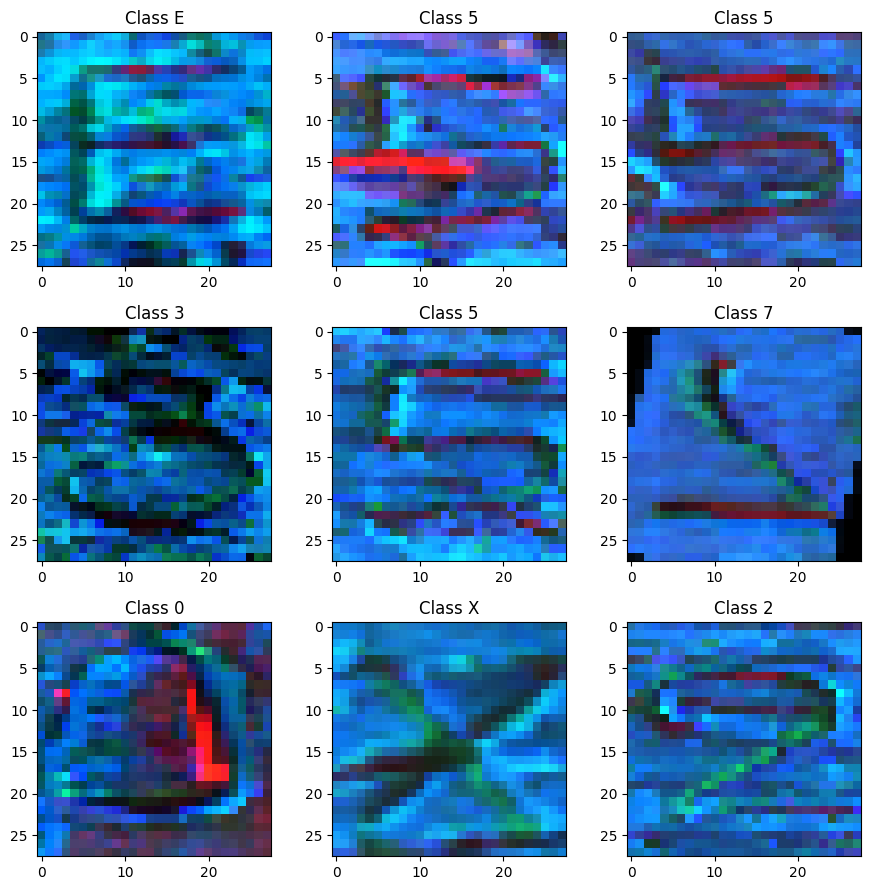

In [67]:
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train_images))
    plt.imshow(X_train_images[num]/255, cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [90]:
print(f"X_train_images shape: {np.array(X_train_images).shape}")
print(f"X_test_images shape: {np.array(X_test_images).shape}")

X_train_images shape: (152203, 28, 28, 3)
X_test_images shape: (26000, 28, 28, 3)


In [91]:
print(type(X_test_images))

# Convert the list of images to a NumPy array
X = np.array(X_train_images)


# Convert the list of images to a NumPy array
X_test = np.array(X_test_images)
print(type(X_test))

<class 'list'>
<class 'numpy.ndarray'>


### Arranging X and X_test

In [92]:

print("Training matrix shape", X.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (152203, 28, 28, 3)
Testing matrix shape (26000, 28, 28, 3)


In [94]:


X = X.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X /= 255                        # Normalizing input values allows the optimizer to work more efficiently, as it brings the input values into a more manageable range. This typically results in faster convergence
X_test /= 255

print("Training matrix shape", X.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (152203, 28, 28, 3)
Testing matrix shape (26000, 28, 28, 3)


### One hot encoding the labels:

In [95]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Convert string labels to integers
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)
y_test_int = label_encoder.transform(y_test)

# Convert integer labels to categorical
y = to_categorical(y_train_int)
y_test = to_categorical(y_test_int)

In [ ]:
y_train_int_back = np.argmax(y, axis=1)
y_train_back = label_encoder.inverse_transform(y_train_int_back)
y_train_back

array(['0', '3', 'C', ..., '9', '9', '9'], dtype='<U1')

In [101]:
print(y.shape)

(152203, 13)


### Training

In [ ]:
# Function to create a CNN model
def create_cnn_model(input_shape=(28, 28, 3), num_classes=13): #0 to 9 +C +E +X 
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(), # Flatten the output of the convolutional layers to pass to the densely connected layers
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
print(X.shape)
print(y.shape)

(152203, 28, 28, 3)
(152204, 13)


In [21]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from sklearn.model_selection import KFold


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store the results
accuracy_scores = []
best_accuracy = 0
best_model = None

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create a new instance of the model
    model = create_cnn_model()
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    
    # Evaluate the model
    scores = model.evaluate(X_val, y_val, verbose=0)
    accuracy_scores.append(scores[1])  # scores[1] is the accuracy
    
    # Check if this model has the best accuracy so far
    if scores[1] > best_accuracy:
        best_accuracy = scores[1]
        best_model = model

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f'Average accuracy: {average_accuracy}')
print(f'Best accuracy: {best_accuracy}')

# Save the best model
best_model.save('best_cnn_model.h5')

c:\Users\berrayan\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8016 - loss: 0.6279 - val_accuracy: 0.9854 - val_loss: 0.0561
Epoch 2/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9739 - loss: 0.0871 - val_accuracy: 0.9907 - val_loss: 0.0346
Epoch 3/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9837 - loss: 0.0541 - val_accuracy: 0.9935 - val_loss: 0.0293
Epoch 4/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9936 - val_loss: 0.0292
Epoch 5/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9898 - loss: 0.0347 - val_accuracy: 0.9951 - val_loss: 0.0228
Epoch 6/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9949 - val_loss: 0.0253
Epoch 7/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9928 - loss: 0.0234 - val_accuracy: 0.9953 - val_loss: 0.0222
Epoch 8/10
3806/3806 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9927 - loss: 0

Average accuracy: 0.995946204662323
Best accuracy: 0.9963864684104919


In [97]:
print(X_test.shape)
print(y_test.shape)


(26000, 28, 28, 3)
(26000, 13)


In [ ]:
from keras.models import load_model
from keras.utils import to_categorical

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9987 - loss: 0.0038
Test accuracy: 0.9986923336982727
Test loss: 0.003971181344240904


### Visualize the output with the first 25 testing images

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


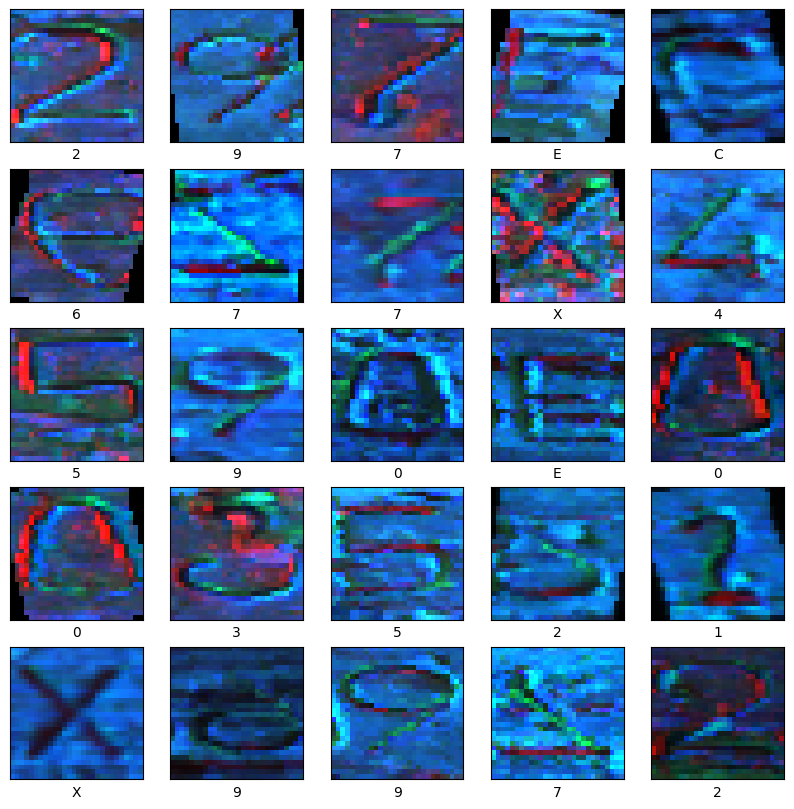

In [111]:
# Make predictions on the test data

predictions = best_model.predict(X_test)
ypreds = np.argmax(predictions, axis=1)
ypreds = label_encoder.inverse_transform(ypreds)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    num = random.randint(0, len(X_test))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[num])
    plt.xlabel(ypreds[num])
plt.show()